In [1]:
import matplotlib.pyplot as plt
import skimage.feature
import pandas as pd

/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
%run utils.py

In [3]:
%run utils_experiments.py

## Load features DF

In [6]:
features_df = pd.read_csv('features/datasetD_haralick_flipped.csv', index_col=0)
features_df.head()

,label,image_number,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,...,haralick_102,haralick_103,haralick_104,haralick_105,haralick_106,haralick_107,haralick_108,haralick_109,haralick_110,haralick_111
FM000001_01,1,1,0.198761,0.176633,1401.682327,0.176633,0.942089,8.885526,6.974416,1.911110,...,0.702851,8.379669,6.290701,2.190982,3.017540,0.041066,1.688582,0.298658,0.606052,1.262888
FM000001_01_flipped,1,1,0.198790,0.175745,1401.343398,0.175745,0.942132,8.885178,6.974454,1.910724,...,0.710738,8.367232,6.259858,2.190982,2.999373,0.041332,1.660751,0.297723,0.603277,1.253913
FM000001_02,1,2,0.189460,0.157913,1791.804663,0.157913,0.933443,10.082708,8.103783,1.978925,...,0.582302,9.895166,7.655817,2.249493,3.419914,0.021327,1.750417,0.097105,0.279537,1.387097
FM000001_02_flipped,1,2,0.189126,0.155427,1796.852278,0.155427,0.933372,10.081195,8.101487,1.979708,...,0.577202,9.873313,7.696423,2.264106,3.511389,0.021065,1.746648,0.097105,0.279537,1.376957
FM000001_03,1,3,0.164801,0.188096,1444.069759,0.188096,0.923676,8.366451,6.313538,2.052913,...,0.624571,8.421179,6.354381,2.201073,3.347930,0.028251,1.652116,0.120142,0.328648,1.220561


In [7]:
features_df = normalize_df(features_df, keep_nonorm=False)
features_df.head()

,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,haralick_8,haralick_9,...,haralick_104,haralick_105,haralick_106,haralick_107,haralick_108,haralick_109,haralick_110,haralick_111,label,image_number
FM000001_01,0.388699,0.147319,0.040682,0.147319,0.833252,0.628296,0.618274,0.428697,0.340901,0.764351,...,0.573670,0.595092,0.505357,0.480876,0.626994,0.530145,0.701759,0.437274,1,1
FM000001_01_flipped,0.388786,0.145975,0.040671,0.145975,0.833504,0.628256,0.618279,0.428375,0.340722,0.764699,...,0.569851,0.595092,0.496929,0.485421,0.596156,0.528160,0.697451,0.428697,1,1
FM000001_02,0.360785,0.118975,0.052645,0.118975,0.782567,0.766120,0.759501,0.485332,0.378979,0.687630,...,0.742719,0.642306,0.692019,0.142606,0.695511,0.102474,0.194685,0.555991,1,2
FM000001_02_flipped,0.359785,0.115211,0.052800,0.115211,0.782149,0.765946,0.759214,0.485985,0.379901,0.687066,...,0.747747,0.654098,0.734455,0.138121,0.691335,0.102474,0.194685,0.546300,1,2
FM000001_03,0.286782,0.164676,0.041982,0.164676,0.725312,0.568538,0.535631,0.547121,0.453786,0.624452,...,0.581556,0.603234,0.658626,0.261272,0.586588,0.151355,0.270954,0.396819,1,3


In [21]:
feats = filter_df_by_dataset(features_df, 'B')
feats.head()

,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,haralick_8,haralick_9,...,haralick_104,haralick_105,haralick_106,haralick_107,haralick_108,haralick_109,haralick_110,haralick_111,label,image_number
FM000001_01,0.388699,0.147319,0.040682,0.147319,0.833252,0.628296,0.618274,0.428697,0.340901,0.764351,...,0.573670,0.595092,0.505357,0.480876,0.626994,0.530145,0.701759,0.437274,1,1
FM000001_01_flipped,0.388786,0.145975,0.040671,0.145975,0.833504,0.628256,0.618279,0.428375,0.340722,0.764699,...,0.569851,0.595092,0.496929,0.485421,0.596156,0.528160,0.697451,0.428697,1,1
FM000001_02,0.360785,0.118975,0.052645,0.118975,0.782567,0.766120,0.759501,0.485332,0.378979,0.687630,...,0.742719,0.642306,0.692019,0.142606,0.695511,0.102474,0.194685,0.555991,1,2
FM000001_02_flipped,0.359785,0.115211,0.052800,0.115211,0.782149,0.765946,0.759214,0.485985,0.379901,0.687066,...,0.747747,0.654098,0.734455,0.138121,0.691335,0.102474,0.194685,0.546300,1,2
FM000001_03,0.286782,0.164676,0.041982,0.164676,0.725312,0.568538,0.535631,0.547121,0.453786,0.624452,...,0.581556,0.603234,0.658626,0.261272,0.586588,0.151355,0.270954,0.396819,1,3


In [25]:
feats.shape

(360, 114)

In [8]:
feats = features_df

## Run experiments

In [9]:
COMMON_STRATEGIES

[{'method': 'SVM', 'kernel': 'rbf'},
 {'method': 'SVM', 'kernel': 'linear'},
 {'method': 'KNN', 'n_neighbors': 5},
 {'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'},
 {'method': 'KNN', 'n_neighbors': 3},
 {'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'},
 {'method': 'KNN', 'n_neighbors': 1},
 {'method': 'MLP'},
 {'method': 'RF'},
 {'method': 'LDA'}]

In [10]:
strategies = [
    {'method': 'SVM', 'kernel': 'rbf'},
    {'method': 'SVM', 'kernel': 'linear'},
    {'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'},
    {'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'},
#     {'method': 'MLP'},
#     {'method': 'RF'},
#     {'method': 'LDA'},
]

In [12]:
cols = list(col for col in features_df.columns if not col.endswith('_nonorm') and col.startswith('haralick'))
len(cols)

112

### Find best strategy

In [22]:
best_acc, best_strategy = find_best_strategy(feats, cols, COMMON_STRATEGIES)

{'method': 'SVM', 'kernel': 'rbf'}	Training...
Accuracy: train: 0.5375, val: 0.225
{'method': 'SVM', 'kernel': 'linear'}	Training...
Accuracy: train: 0.7166666666666667, val: 0.175
{'method': 'KNN', 'n_neighbors': 5}	Training...
Accuracy: train: 0.7291666666666666, val: 0.2
{'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'}	Training...
Accuracy: train: 1.0, val: 0.2
{'method': 'KNN', 'n_neighbors': 3}	Training...
Accuracy: train: 0.9916666666666667, val: 0.175
{'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'}	Training...
Accuracy: train: 1.0, val: 0.175
{'method': 'KNN', 'n_neighbors': 1}	Training...
Accuracy: train: 1.0, val: 0.2
{'method': 'MLP'}	Training...
Accuracy: train: 0.5875, val: 0.125
{'method': 'RF'}	

/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training...
Accuracy: train: 1.0, val: 0.225
{'method': 'LDA'}	Training...
Accuracy: train: 1.0, val: 0.275


In [23]:
print(best_acc, best_strategy)

0.275 {'method': 'LDA'}


In [24]:
run_experiment(feats, cols, option='test', show_cm=False, **best_strategy)

Training...
Accuracy: train: 1.0, test: 0.3125


0.3125

### Find best strategy usando Baggings

In [27]:
bagging_kwargs={
    'max_samples': 1.0,
    'max_features': 0.5,
}

In [28]:
best_acc, best_strategy = find_best_strategy(feats, cols, COMMON_STRATEGIES,
                                             bagging=True, bagging_kwargs=bagging_kwargs)

{'method': 'SVM', 'kernel': 'rbf'}	Training...
Accuracy: train: 0.5125, val: 0.2
{'method': 'SVM', 'kernel': 'linear'}	Training...
Accuracy: train: 0.6041666666666666, val: 0.2
{'method': 'KNN', 'n_neighbors': 5}	Training...
Accuracy: train: 0.8291666666666667, val: 0.15
{'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'}	Training...
Accuracy: train: 1.0, val: 0.225
{'method': 'KNN', 'n_neighbors': 3}	Training...
Accuracy: train: 0.9666666666666667, val: 0.175
{'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'}	Training...
Accuracy: train: 0.9958333333333333, val: 0.225
{'method': 'KNN', 'n_neighbors': 1}	Training...
Accuracy: train: 0.9958333333333333, val: 0.225
{'method': 'MLP'}	Training...


/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWa

Accuracy: train: 0.5208333333333334, val: 0.175
{'method': 'RF'}	

/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training...
Accuracy: train: 1.0, val: 0.275
{'method': 'LDA'}	Training...
Accuracy: train: 1.0, val: 0.325


In [26]:
print(best_acc, best_strategy)

0.875 {'method': 'SVM', 'kernel': 'linear'}


Training...
Accuracy: train: 1.0, test: 0.90625


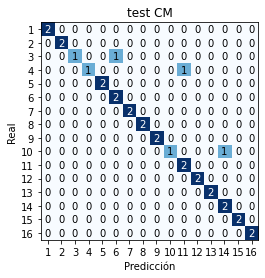

0.90625

In [27]:
run_experiment(features_df, cols, option='test', **best_strategy, bagging=True, bagging_kwargs=bagging_kwargs)